![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

# **AssertionDLApproach**

This notebook will cover the different parameters and usages of `AssertionDLApproach` annotator.

**📖 Learning Objectives:**

1. Understand how to use `AssertionDLApproach`.

2. Become comfortable using the different parameters of the annotator.

3. Train a `AssertionDLApproach` annotator and use that model with `AssertionDLApproach` in the future.


**🔗 Helpful Links:**

- Documentation : [AssertionDL](https://nlp.johnsnowlabs.com/docs/en/licensed_annotators#assertiondl)

- Python Docs : [AssertionDLApproach](https://nlp.johnsnowlabs.com/licensed/api/python/reference/autosummary/sparknlp_jsl/annotator/assertion/assertionDL/index.html#sparknlp_jsl.annotator.assertion.assertionDL.AssertionDLApproach)

- Scala Docs : [AssertionDLApproach](https://nlp.johnsnowlabs.com/licensed/api/com/johnsnowlabs/nlp/annotators/assertion/dl/AssertionDLApproach.html)

- For extended examples of usage, see the [Spark NLP Workshop repository](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/healthcare-nlp/02.0.Clinical_Assertion_Model.ipynb#scrollTo=97ATs6a41jdE).

## **📜 Background**


The Spark NLP `AssertionDLApproach` refers to a methodology or approach within the Spark NLP framework, specifically designed for handling clinical text data. This annotator is utilized for the classification of named entities based on their assertion types, such as "present", "absent", "hypothetical", "conditional", "associated_with_other_person", and others. It leverages deep learning techniques to automatically assign these assertion labels to clinically relevant entities in textual data, aiding in the extraction of meaningful insights and information from medical and healthcare texts.

The training data should have annotations columns of type **DOCUMENT**, **CHUNK**, **WORD_EMBEDDINGS**, the label column (The assertion status that you want to predict), the start (the start index for the term that has the assertion status), the end column (the end index for the term that has the assertion status).

## **🎬 Colab Setup**

In [ ]:
!pip install -q johnsnowlabs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.2/676.2 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.8 M

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

Please Upload your John Snow Labs License using the button below


Saving spark_nlp_for_healthcare_spark_ocr_8734.json to spark_nlp_for_healthcare_spark_ocr_8734.json


In [ ]:
from johnsnowlabs import nlp, medical

nlp.install()

👌 Detected license file /content/spark_nlp_for_healthcare_spark_ocr_8734.json
🚨 Outdated OCR Secrets in license file. Version=5.3.1 but should be Version=5.3.2
📋 Stored John Snow Labs License in /root/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json
👷 Setting up  John Snow Labs home in /root/.johnsnowlabs, this might take a few minutes.
🙆 JSL Home setup in /root/.johnsnowlabs
👌 Detected license file /content/spark_nlp_for_healthcare_spark_ocr_8734.json
Installing /root/.johnsnowlabs/py_installs/spark_nlp_jsl-5.3.2-py3-none-any.whl to /usr/bin/python3
Installed 1 products:
💊 Spark-Healthcare==5.3.2 installed! ✅ Heal the planet with NLP! 


In [ ]:
spark = nlp.start()
spark

👌 Detected license file /content/spark_nlp_for_healthcare_spark_ocr_8734.json
👌 Launched cpu optimized session with with: 🚀Spark-NLP==5.3.2, 💊Spark-Healthcare==5.3.2, running on ⚡ PySpark==3.4.0


## **🖨️ Input/Output Annotation Types**

- Input Annotation type: `DOCUMENT`, `CHUNK`, `WORD_EMBEDDINGS`

- Output Annotation type: `ASSERTION`

## **🔎 Parameters**


The parameters below are the shared parameters with `AssertionDLApproach`. So you can use them as in `AssertionDLApproach`.

- `inputCols`: Gets current column names of input annotations.
- `outputCol`: Gets output column name of annotations.
- `ScopeWindow`: Sets the scope of the window of the assertion expression.
- `StartCol`: Set a column that contains the token number for the start of the target.

- `doExceptionHandling`: If true, exceptions are handled.



## Build a AssertionDLApproach pipeline

Let's build a pipeline AssertionDLApproach

In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/i2b2_assertion_sample_short.csv

In [ ]:
assertion_df = spark.read.option("header", True).option("inferSchema", "True").csv("i2b2_assertion_sample_short.csv")

In [ ]:
assertion_df.show(3, truncate=100)

+-------------------------------------------------+-------------------+-------+-----+---+
|                                             text|             target|  label|start|end|
+-------------------------------------------------+-------------------+-------+-----+---+
|She has no history of liver disease , hepatitis .|      liver disease| absent|    5|  6|
|                         1. Undesired fertility .|undesired fertility|present|    1|  2|
|                            3) STATUS POST FALL .|               fall|present|    3|  3|
+-------------------------------------------------+-------------------+-------+-----+---+
only showing top 3 rows



In [ ]:
(training_data, test_data) = assertion_df.randomSplit([0.8, 0.2], seed = 100)
print("Training Dataset Count: " + str(training_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 721
Test Dataset Count: 170


In [ ]:
training_data.groupBy('label').count().orderBy('count', ascending=False).show(truncate=False)


+-------+-----+
|label  |count|
+-------+-----+
|present|546  |
|absent |175  |
+-------+-----+



In [ ]:
document = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

chunk = nlp.Doc2Chunk()\
    .setInputCols("document")\
    .setOutputCol("chunk")\
    .setChunkCol("target")\
    .setStartCol("start")\
    .setStartColByTokenIndex(True)\
    .setFailOnMissing(False)\
    .setLowerCase(True)

token = nlp.Tokenizer()\
    .setInputCols(['document'])\
    .setOutputCol('token')

embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["document", "token"])\
    .setOutputCol("embeddings")

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]


We will transform our test data with a pipeline consisting of same steps with the pipeline which contains AssertionDLApproach.
By doing this, we enable that test data will have same columns with training data in AssertionDLApproach. <br/>
The goal of this implementation is enabling the usage of `setTestDataset()` parameter in AssertionDLApproach.

In [ ]:
clinical_assertion_pipeline = nlp.Pipeline(
    stages = [
    document,
    chunk,
    token,
    embeddings])

assertion_test_data = clinical_assertion_pipeline.fit(test_data).transform(test_data)

In [ ]:
assertion_test_data.columns

['text',
 'target',
 'label',
 'start',
 'end',
 'document',
 'chunk',
 'token',
 'embeddings']

We save the test data in parquet format to use in `AssertionDLApproach()`.

In [ ]:
assertion_test_data.write.parquet('i2b2_assertion_sample_test_data.parquet')

## Graph setup and training

In [ ]:
!pip install -q tensorflow==2.11.0
!pip install -q tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 46.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 3.19.6 which is incompatible.
pandas-gbq 0.19.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tensorflow-datasets 4.9.5 requires protobuf>=

We will use TFGraphBuilder annotator which can be used to create graphs in the model training pipeline.

TFGraphBuilder inspects the data and creates the proper graph if a suitable version of TensorFlow (<= 2.7 ) is available. The graph is stored in the defined folder and loaded by the approach.

In [ ]:
graph_folder= "./tf_graphs"

In [ ]:
assertion_graph_builder = medical.TFGraphBuilder()\
    .setModelName("assertion_dl")\
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setLabelColumn("label")\
    .setGraphFolder(graph_folder)\
    .setGraphFile("assertion_graph.pb")\
    .setMaxSequenceLength(250)\
    .setHiddenUnitsNumber(25)

**Setting the Scope Window (Target Area) Dynamically in Assertion Status Detection Models**


This parameter allows you to train the Assertion Status Models to focus on specific context windows when resolving the status of a NER chunk. The window is in format `[X,Y]` being `X` the number of tokens to consider on the left of the chunk, and `Y` the max number of tokens to consider on the right. Let’s take a look at what different windows mean:


*   By default, the window is `[-1,-1]` which means that the Assertion Status will look at all of the tokens in the sentence/document (up to a maximum of tokens set in `setMaxSentLen()` ).
*   `[0,0]` means “don’t pay attention to any token except the ner_chunk”, what basically is not considering any context for the Assertion resolution.
*   `[9,15]` is what empirically seems to be the best baseline, meaning that we look up to 9 tokens on the left and 15 on the right of the ner chunk to understand the context and resolve the status.


Check this [Scope Window Tuning Assertion Status Detection notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/2.1.Scope_window_tuning_assertion_status_detection.ipynb)  that illustrates the effect of the different windows and how to properly fine-tune your AssertionDLModels to get the best of them.

In our case, the best Scope Window is around [10,10]

In [ ]:
scope_window = [10,10]

assertionStatus = medical.AssertionDLApproach()\
    .setLabelCol("label")\
    .setInputCols("document", "chunk", "embeddings")\
    .setOutputCol("assertion")\
    .setBatchSize(64)\
    .setDropout(0.1)\
    .setLearningRate(0.001)\
    .setEpochs(20)\
    .setValidationSplit(0.2)\
    .setStartCol("start")\
    .setEndCol("end")\
    .setMaxSentLen(250)\
    .setIncludeConfidence(True)\
    .setEnableOutputLogs(True)\
    .setOutputLogsPath('training_logs/')\
    .setGraphFolder(graph_folder)\
    .setGraphFile(f"{graph_folder}/assertion_graph.pb")\
    .setTestDataset(path="/content/i2b2_assertion_sample_test_data.parquet")\
    .setScopeWindow(scope_window)\

'''
If .setTestDataset parameter is employed, raw test data cannot be fitted. .setTestDataset only works for dataframes which are correctly transformed
by a pipeline consisting of document, chunk, embeddings stages.
'''

'\nIf .setTestDataset parameter is employed, raw test data cannot be fitted. .setTestDataset only works for dataframes which are correctly transformed\nby a pipeline consisting of document, chunk, embeddings stages.\n'

In [ ]:
'''
assertionStatus = medical.AssertionLogRegApproach()\
    .setLabelCol("label")\
    .setInputCols("document", "chunk", "embeddings")\
    .setOutputCol("assertion")\
    .setMaxIter(100) # default: 26
'''

'\nassertionStatus = medical.AssertionLogRegApproach()    .setLabelCol("label")    .setInputCols("document", "chunk", "embeddings")    .setOutputCol("assertion")    .setMaxIter(100) # default: 26\n'

In [ ]:
clinical_assertion_pipeline = nlp.Pipeline(
    stages = [
    document,
    chunk,
    token,
    embeddings,
    assertion_graph_builder,
    assertionStatus])

In [ ]:
%%time

assertion_model = clinical_assertion_pipeline.fit(training_data)

TF Graph Builder configuration:
Model name: assertion_dl
Graph folder: ./tf_graphs
Graph file name: assertion_graph.pb
Build params: {'n_classes': 2, 'feat_size': 200, 'max_seq_len': 250, 'n_hidden': 25}


Instructions for updating:
non-resource variables are not supported in the long term


Device mapping: no known devices.


Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Device mapping: no known devices.
assertion_dl graph exported to ./tf_graphs/assertion_graph.pb
CPU times: user 16.7 s, sys: 1.38 s, total: 18.1 s
Wall time: 3min 55s


## Checking the results

Checking the results saved in the log file

In [ ]:
import os
log_files = os.listdir("./training_logs")
log_files

['AssertionDLApproach_4dbce7841b1a.log']

In [ ]:
with open("./training_logs/"+log_files[0]) as log_file:
    print(log_file.read())

Name of the selected graph: ./tf_graphs/assertion_graph.pb
Training started, trainExamples: 721


Epoch: 0 started, learning rate: 0.001, dataset size: 577
Done, 9.842830197 total training loss: 12.7521715, avg training loss: 1.2752172, batches: 10
Quality on validation dataset (20.0%), validation examples = 144
time to finish evaluation: 1.42s
Total validation loss: 1.8390	Avg validation loss: 0.6130
label	 tp	 fp	 fn	 prec	 rec	 f1
present	 95	 27	 15	 0.77868855	 0.8636364	 0.81896555
absent	 7	 15	 27	 0.3181818	 0.20588236	 0.25
tp: 102 fp: 42 fn: 42 labels: 2
Macro-average	 prec: 0.5484352, rec: 0.53475934, f1: 0.54151094
Micro-average	 prec: 0.7083333, rec: 0.7083333, f1: 0.7083334


Quality on test dataset: 
time to finish evaluation: 1.19s
Total test loss: 2.3899	Avg test loss: 0.7966
label	 tp	 fp	 fn	 prec	 rec	 f1
present	 94	 42	 23	 0.6911765	 0.8034188	 0.743083
absent	 11	 23	 42	 0.32352942	 0.20754717	 0.25287357
tp: 105 fp: 65 fn: 65 labels: 2
Macro-average	 prec: 0.

In [ ]:
preds = assertion_model.transform(test_data).select('label','assertion.result')

preds.show()

+-------+---------+
|  label|   result|
+-------+---------+
|present|[present]|
| absent|[present]|
|present|[present]|
|present|[present]|
|present|[present]|
|present|[present]|
|present|[present]|
|present|[present]|
|present| [absent]|
|present|[present]|
|present|[present]|
|present|[present]|
|present|[present]|
|present|[present]|
|present|[present]|
|present|[present]|
|present|[present]|
|present|[present]|
|present|[present]|
|present|[present]|
+-------+---------+
only showing top 20 rows



In [ ]:
preds_df = preds.toPandas()

In [ ]:
preds_df['result'] = preds_df['result'].apply(lambda x : x[0])
preds_df

,label,result
0,present,present
1,absent,present
2,present,present
3,present,present
4,present,present
...,...,...
165,present,present
166,absent,absent
167,absent,absent
168,absent,absent


In [ ]:
# We are going to use sklearn to evalute the results on test dataset
from sklearn.metrics import classification_report

print (classification_report( preds_df['label'], preds_df['result']))

              precision    recall  f1-score   support

      absent       0.78      0.72      0.75        53
     present       0.88      0.91      0.89       117

    accuracy                           0.85       170
   macro avg       0.83      0.81      0.82       170
weighted avg       0.84      0.85      0.85       170



In [ ]:
# save model
assertion_model.stages[-1].write().overwrite().save('assertion_custom_model')

## Load saved model

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

# Sentence Detector annotator, processes various sentences per line
sentenceDetector = nlp.SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

# Tokenizer splits words in a relevant format for NLP
tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings = nlp.WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]


In [ ]:
clinical_ner = medical.NerModel.pretrained("ner_clinical", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner")

ner_converter = medical.NerConverterInternal() \
    .setInputCols(["sentence", "token", "ner"]) \
    .setOutputCol("ner_chunk")

clinical_assertion = medical.AssertionDLModel.load("assertion_custom_model") \
    .setInputCols(["sentence", "ner_chunk", "embeddings"]) \
    .setOutputCol("assertion")

nlpPipeline = nlp.Pipeline(stages=[
    documentAssembler,
    sentenceDetector,
    tokenizer,
    word_embeddings,
    clinical_ner,
    ner_converter,
    clinical_assertion
    ])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = nlpPipeline.fit(empty_data)


ner_clinical download started this may take some time.
[OK!]


In [ ]:
text = 'Patient has a headache for the last 2 weeks, needs to get a head CT, and appears anxious when she walks fast. No alopecia noted. She denies pain'

import pandas as pd

light_model = nlp.LightPipeline(model)

light_result = light_model.fullAnnotate(text)[0]

print(text)

chunks=[]
entities=[]
status=[]
confidence=[]

for n,m in zip(light_result['ner_chunk'],light_result['assertion']):

    chunks.append(n.result)
    entities.append(n.metadata['entity'])
    status.append(m.result)
    confidence.append(m.metadata['confidence'])

df = pd.DataFrame({'chunks':chunks, 'entities':entities, 'assertion':status, 'confidence':confidence})

df

Patient has a headache for the last 2 weeks, needs to get a head CT, and appears anxious when she walks fast. No alopecia noted. She denies pain


,chunks,entities,assertion,confidence
0,a headache,PROBLEM,present,0.9946
1,a head CT,TEST,present,0.9877
2,anxious,PROBLEM,absent,0.5823
3,alopecia,PROBLEM,absent,0.8129
4,pain,PROBLEM,absent,0.7942


# Scope Window: how different values affect the results

Although having all the words by default may be a good starting baseline, it's clearly not the best. Let's see some examples.

## Good, but not optimal?
These windows would be more optimal for absence for some examples including `no` as a word before the NER chunk

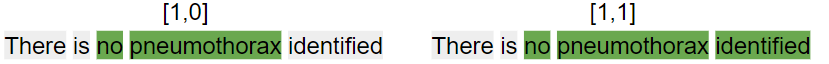

## Out of reach?

However, setting small windows would prevent us from capturing negation in longer contexts:

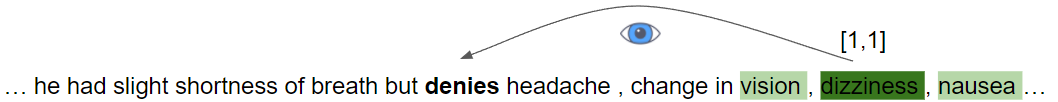

## Too much awareness?

That's why big contexts are usually a good idea. But, how big? If they are too big, we can incur in false positives (FP) as illustrates the following example:

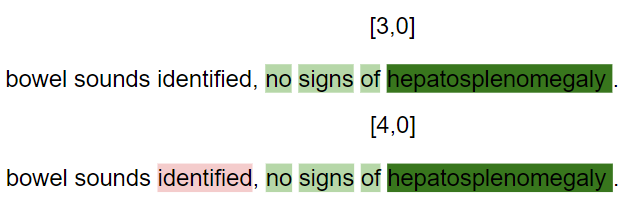

## Grid-search and Finetuning of the Scope Window values
* As commented before, the default Scope Window is [-1,-1] what means "all the context available in the sentence / document, up to a max number of tokens set in the `setMaxSentLen()` function.
* Empirically, and in general terms, the optimal window is around [9, 15]
* However, it's very important you finetune the Scope Window to your **dataset**

Let's see how you can finetune to get the best of your AssertionStatusDLModel.

## Get a series of windows you want to test.
In this example, we will test from `[0,0]` to `[50,50]` and then `[-1,-1]`

In [ ]:
scope_window = [0,0]

In [ ]:
assertionStatus = medical.AssertionDLApproach()\
    .setLabelCol("label")\
    .setInputCols("document", "chunk", "embeddings")\
    .setOutputCol("assertion")\
    .setBatchSize(128)\
    .setLearningRate(0.01)\
    .setEpochs(25)\
    .setStartCol("start")\
    .setEndCol("end")\
    .setEnableOutputLogs(True)\
    .setOutputLogsPath('training_logs/')\
    .setGraphFolder(graph_folder)\
    .setGraphFile(f"{graph_folder}/assertion_graph.pb")\
    .setTestDataset(path="i2b2_assertion_sample_test_data.parquet", read_as='SPARK', options={'format': 'parquet'})\
    .setScopeWindow(scope_window)


clinical_assertion_pipeline = nlp.Pipeline(
    stages = [
    document,
    chunk,
    token,
    embeddings,
    assertion_graph_builder,
    assertionStatus])

In [ ]:
%%time
assertion_model = clinical_assertion_pipeline.fit(training_data)

TF Graph Builder configuration:
Model name: assertion_dl
Graph folder: ./tf_graphs
Graph file name: assertion_graph.pb
Build params: {'n_classes': 2, 'feat_size': 200, 'max_seq_len': 250, 'n_hidden': 25}
Device mapping: no known devices.
Device mapping: no known devices.
assertion_dl graph exported to ./tf_graphs/assertion_graph.pb
CPU times: user 7.89 s, sys: 357 ms, total: 8.25 s
Wall time: 3min 50s


In [ ]:
assertion_model.stages[-1].write().overwrite().save('models/window_0_0/')

If you repeat the process with different scope_windows, and get the metrics, you will get a grid search table similar to the following one (using Scope Windows from 0 to 50, and also [-1, -1])

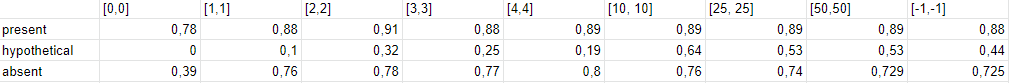

In [ ]:
windows = [0,1,2,3,4,10]

pd_df_absent = test_data.toPandas()
pd_df_absent = pd_df_absent[pd_df_absent['label']=='absent']

for r in pd_df_absent.itertuples():
    start = r.text.find(r.target)
    end = start + len(r.target)
    text_before = r.text[:start]
    text_end = r.text[end:]
    for w in windows:
        if w == 0:
            print(f"Window: {[w,w]}: {r.target}")
        else:
            print(f"Window: {[w,w]}: ..." + ' '.join(text_before.split(' ')[-1*(w+1):]) + ' ' + r.target + ' ' + ' '.join(text_end.split(' ')[:(w+1)]))
    print("="*50)

Window: [0, 0]: foot lesions
Window: [1, 1]: ...or  foot lesions  .
Window: [2, 2]: ...retinopathy or  foot lesions  .
Window: [3, 3]: ...no retinopathy or  foot lesions  .
Window: [4, 4]: ...with no retinopathy or  foot lesions  .
Window: [10, 10]: ...dependent diabetes mellitus x 15 years with no retinopathy or  foot lesions  .
Window: [0, 0]: acute bleed
Window: [1, 1]: ...no  acute bleed  and
Window: [2, 2]: ...revealed no  acute bleed  and a
Window: [3, 3]: ...which revealed no  acute bleed  and a lumbar
Window: [4, 4]: ...head which revealed no  acute bleed  and a lumbar puncture
Window: [10, 10]: ...included a CT scan of the head which revealed no  acute bleed  and a lumbar puncture which revealed a glucose of 72
Window: [0, 0]: nad
Window: [1, 1]: ..., NA nad O X
Window: [2, 2]: ...3 , NA nad O X 3
Window: [3, 3]: ...X 3 , NA nad O X 3 ,
Window: [4, 4]: ...A&O X 3 , NA nad O X 3 , NAD
Window: [10, 10]: ...A&O X 3 , NA nad O X 3 , NAD
Window: [0, 0]: nohepatosplenomegaly
Window: